In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5),
             'figure.dpi': 160})

In [2]:
df = pd.read_pickle('C:/Users/johnj/Documents/Data/aml in econ 02 spring 2021/class data/class_data.pkl')
df.columns

Index(['pct_d_rgdp', 'urate_bin', 'pos_net_jobs', 'emp_estabs',
       'estabs_entry_rate', 'estabs_exit_rate', 'pop', 'pop_pct_black',
       'pop_pct_hisp', 'lfpr', 'density', 'year'],
      dtype='object')

In [3]:
reg = smf.ols(formula = 'pos_net_jobs ~ estabs_entry_rate', data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:           pos_net_jobs   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          6.50e-319
Time:                        22:03:10   Log-Likelihood:                -35773.
No. Observations:               50834   AIC:                         7.155e+04
Df Residuals:                   50832   BIC:                         7.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3048      0.00

In [4]:
m = reg.params[1]
s = reg.bse[1]

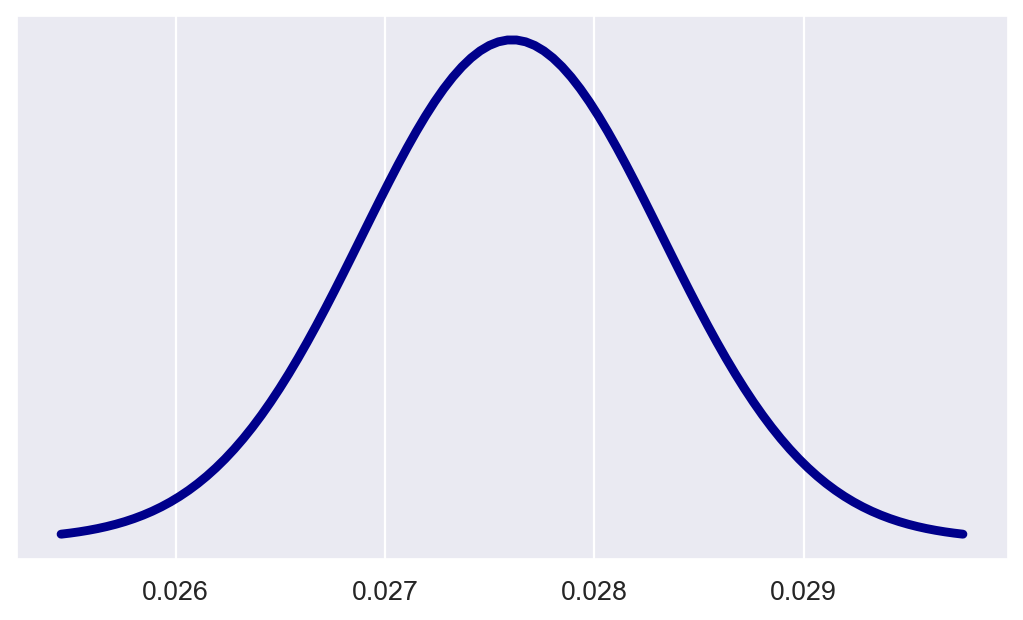

In [5]:
x = np.linspace(m - 3*s, m + 3*s, 100)

plt.plot(x, stats.norm.pdf(x, m, s), linewidth = 4, color = 'darkblue')
plt.yticks([])

plt.savefig('beta dist', dpi = 160)

In [6]:
np.random.seed(490)

n = df.shape[0]

beta = []

for i in tqdm(range(1000)):
    indx = np.random.choice(range(n), n)
    reg = smf.ols(formula = 'pos_net_jobs ~ estabs_entry_rate', data = df.iloc[indx]).fit()
    # fit.intercept_
    beta.append(reg.params[1])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.34it/s]


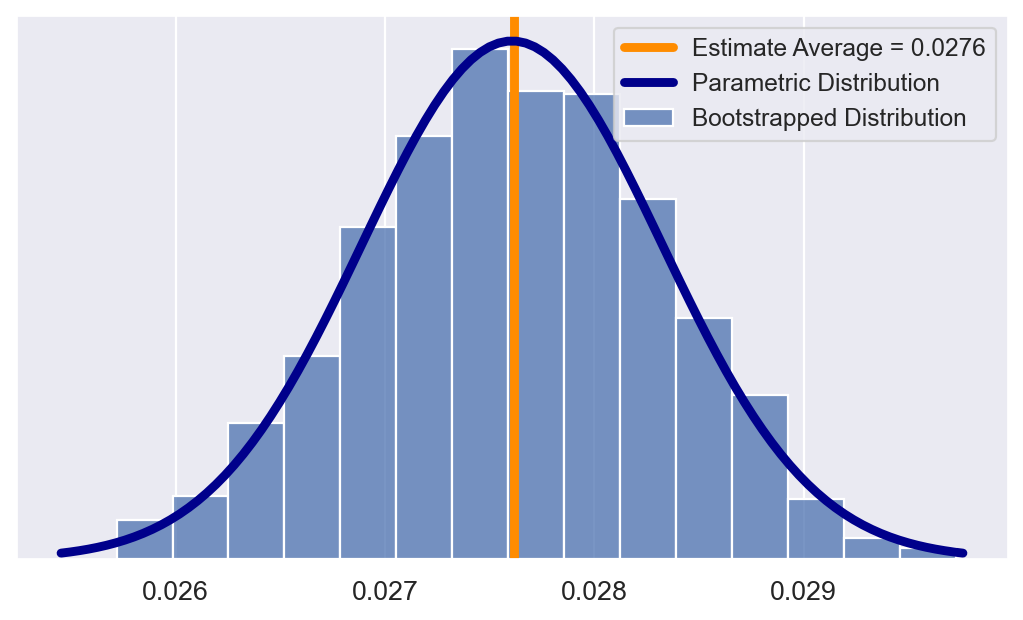

In [7]:
sns.histplot(beta, bins = 15, label = 'Bootstrapped Distribution')
plt.axvline(x = np.mean(beta), ymin = 0, ymax = 210, color = 'darkorange', linewidth = 4, label = 'Estimate Average = {0:.4f}'.format(np.mean(beta)))
plt.plot(x, stats.norm.pdf(x, m, s)/3.75, color = 'darkblue', linewidth = 4, label = 'Parametric Distribution')

plt.yticks([])
plt.ylabel('')
plt.legend()

plt.savefig('bootstrap estimate', dpi = 160)